In [8]:
# Nhập các thư viện cần thiết
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Đọc dữ liệu
movies = pd.read_csv("resource/movies.csv")
ratings = pd.read_csv("resource/ratings.csv")
links = pd.read_csv("resource/links.csv")  
tags = pd.read_csv("resource/tags.csv")    

# Xem thông tin dữ liệu
print(movies.info())
print(ratings.info())

# Xem 5 dòng đầu
print(movies.head())
print(ratings.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB
None
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (

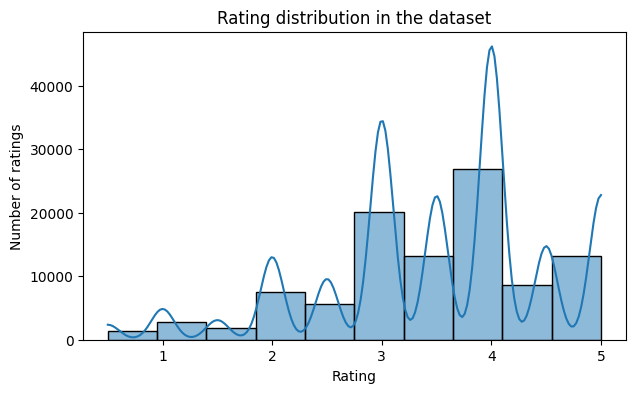

In [9]:
# Kiểm tra phân phối rating
plt.figure(figsize=(7,4))
sns.histplot(ratings['rating'], bins=10, kde=True)
plt.xlabel("Rating")
plt.ylabel("Number of ratings")
plt.title("Rating distribution in the dataset")
plt.show()

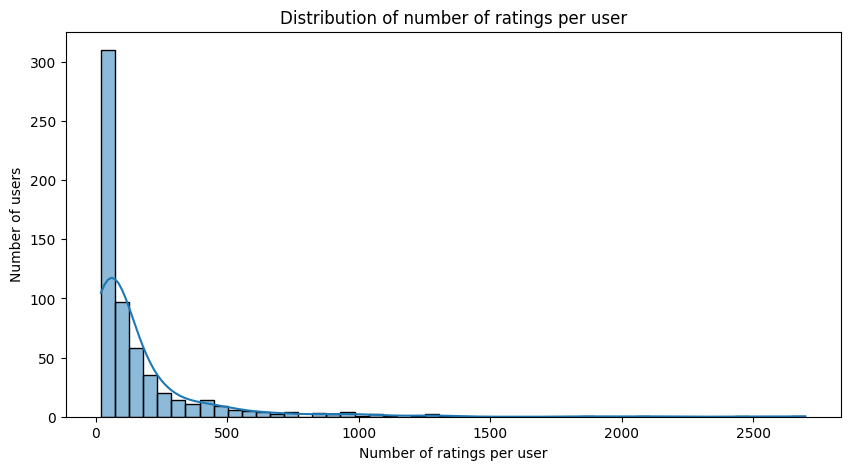

In [10]:
# Kiểm tra lượng rating của mỗi user
user_ratings = ratings.groupby("userId")["rating"].count()
plt.figure(figsize=(10,5))
sns.histplot(user_ratings, bins=50, kde=True)
plt.xlabel("Number of ratings per user")
plt.ylabel("Number of users")
plt.title("Distribution of number of ratings per user")
plt.show()

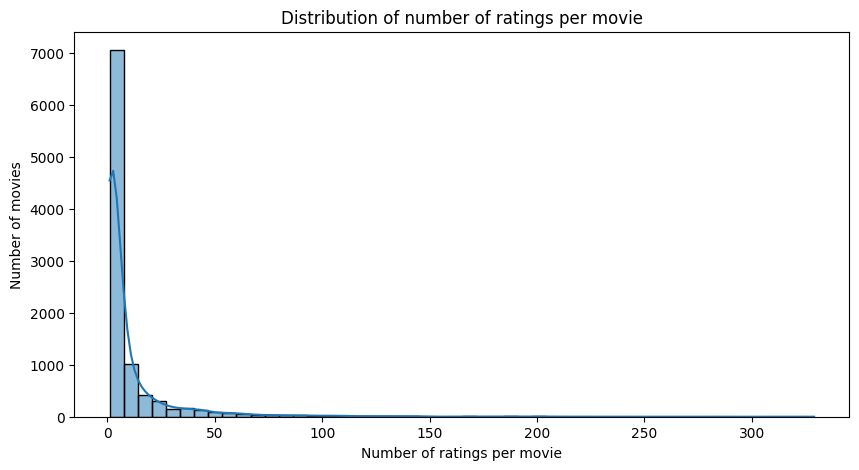

In [11]:
# Kiểm tra lượng rating mỗi bộ phim
movie_ratings = ratings.groupby("movieId")["rating"].count()
plt.figure(figsize=(10,5))
sns.histplot(movie_ratings, bins=50, kde=True)
plt.xlabel("Number of ratings per movie")
plt.ylabel("Number of movies")
plt.title("Distribution of number of ratings per movie")
plt.show()

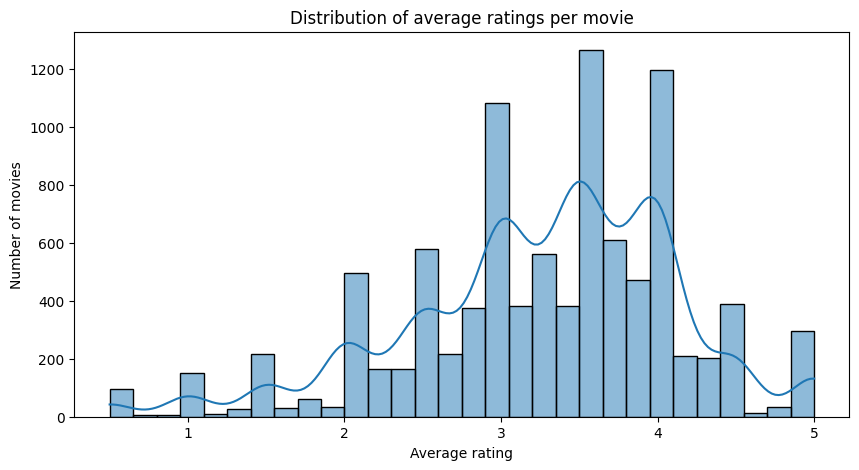

In [12]:
# Kiểm tra lượng rating trung bình mỗi bộ phim
avg_movie_ratings = ratings.groupby("movieId")["rating"].mean()
plt.figure(figsize=(10,5))
sns.histplot(avg_movie_ratings, bins=30, kde=True)
plt.xlabel("Average rating")
plt.ylabel("Number of movies")
plt.title("Distribution of average ratings per movie")
plt.show()

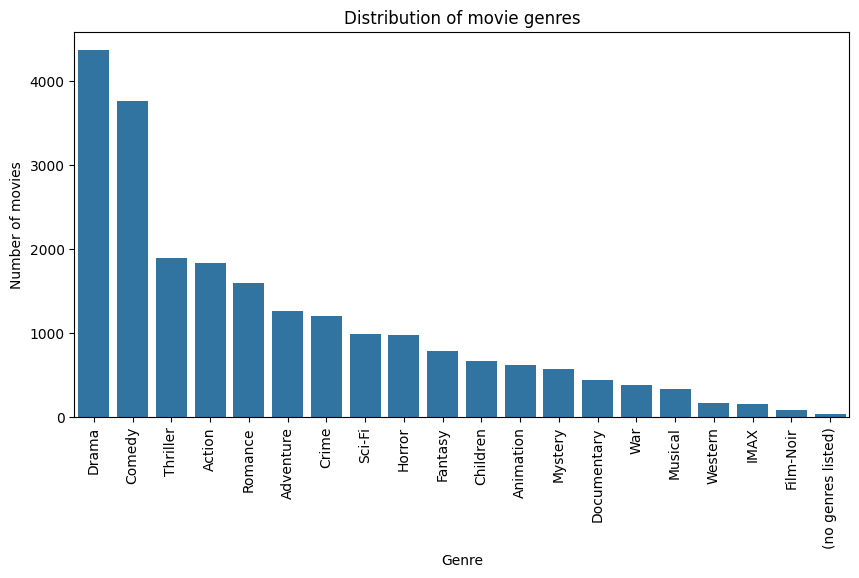

In [13]:
# Kiểm tra các thể loại phim phổ biến
genre_counts = movies['genres'].str.split('|').explode().value_counts()
plt.figure(figsize=(10,5))
sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.xticks(rotation=90)
plt.xlabel("Genre")
plt.ylabel("Number of movies")
plt.title("Distribution of movie genres")
plt.show()

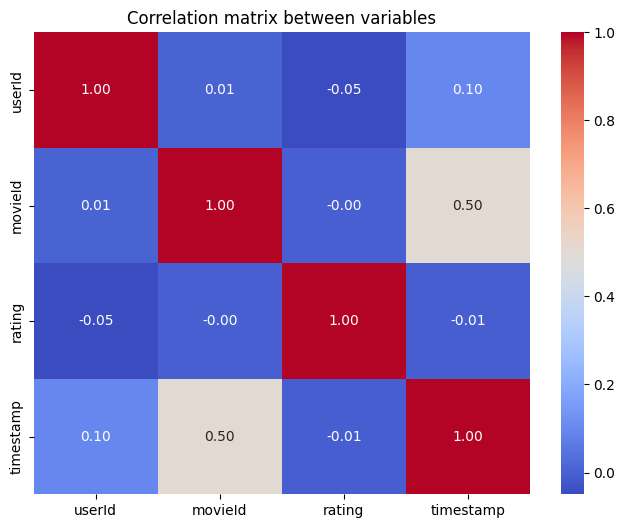

In [14]:
# Ma trận tương quan giữa các biến
correlation_matrix = ratings.corr()
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation matrix between variables")
plt.show()